# Project Introduction

This is the motivation and background for the project.

THIS IS THE OVERALL GOAL & DESIRED OUTCOME OF OUR PROJECT

This project explores the data from UCI Machine Learning posted up on Kaggle. 

## Process Overview
1. Ingest the Data
1. Exploratory Data Analysis
1. PCA with Visualization
1. KNN
1. Logistic Regression
1. Decision Trees (and variantions)
1. Comparison of Results
1. Conclusions
1. Recommendations and Next Steps

### Imports

In [2]:
# Imports 
%matplotlib inline

# General Python libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import time

# Feature Extraction & Unsupervised Libraries
from sklearn.feature_extraction.text import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

from matplotlib.colors import LogNorm

# Learning/Model Libraries
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
# Add trees libraries

# Evaluation Libarires
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

## Data Ingestion

In [55]:
# Read in the raw data, process and save into different folder
RAWDATA_PATH = '../data/raw/UCIHumanActivity/'
df_rtrain = pd.read_csv(f'{RAWDATA_PATH}train.csv')
train_labels = df_rtrain['Activity'].values

train_group = ["DYNAMIC" if 'WALKING' in activity else "STATIC" for activity in train_labels]
target_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
group_names = ['DYNAMIC', 'STATIC']
all_columns = df_rtrain.columns
feature_columns = all_columns[0:561]
train_data = df_rtrain[feature_columns].values
df_rtrain.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [56]:
df_rtest = pd.read_csv(f'{RAWDATA_PATH}test.csv')
test_labels = df_rtest['Activity'].values
test_group = ["DYNAMIC" if 'WALKING' in activity else "STATIC" for activity in test_labels]
test_data = df_rtest[feature_columns].values
df_rtest.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [61]:
def show_confusion_mat(test_labels, predict_labels, target_names):
    size_val = len(target_names)
    
    # Calculate the confusion matrix
    result_confusion = confusion_matrix(test_labels, predict_labels, target_names)
    
    # Create a heat map version of the confusion matrix to print
    fig = plt.figure(figsize = (size_val, size_val))
    ax = fig.add_subplot(1, 1, 1)
    im = ax.imshow(result_confusion, cmap = plt.get_cmap('PuRd'))
    target_values = np.arange(size_val)
    ax.set_xticks(target_values)
    ax.set_yticks(target_values)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xticklabels(target_names, rotation = 90)
    ax.set_yticklabels(target_names)
    # Loop over data dimensions and create text annotations.
    for x_ind in target_values:
        for y_ind in target_values:
            text = ax.text(y_ind, x_ind, result_confusion[x_ind, y_ind],
                       ha="center", va="center", color="k")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    fig.tight_layout()
    plt.show()

## Exploratory Data Analysis

## Logistic Regression

In [21]:
model_log = LogisticRegression()
model_log.fit(train_data, train_labels)
predict_labels = model_log.predict(test_data)
        
# Calculate metrics
#accuracy = sum(train_labels == predict_labels) / len(test_labels)
f1_score = metrics.f1_score(test_labels, predict_labels, average = 'weighted')

#print(accuracy)
print(f1_score)

0.9618652634530593


In [44]:
parameters = {'penalty':('l1', 'l2'), 'C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 1.25,  2, 5, 10]}
#[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99, 1, 1.25, 1.5, 2, 5, 10, 50, 100, 500, 1000]}
model_log = LogisticRegression()
search_model = GridSearchCV(model_log, parameters)
search_model.fit(train_data, train_labels)

output = search_model.cv_results_ 
output

/Users/annielane/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/annielane/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/annielane/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/annielane/anac

{'mean_fit_time': array([0.99248608, 1.54560741, 1.0301586 , 1.93952719, 1.637954  ,
        2.66262142, 2.57885615, 3.14195434, 2.96348405, 3.22251042,
        3.10463929, 3.26611757, 3.31835238, 3.34512575, 3.81967409,
        3.43885859, 5.41948533, 3.83819636, 7.48455429, 4.09050226]),
 'mean_score_time': array([0.00888364, 0.00750891, 0.00564138, 0.00622416, 0.00603541,
        0.00567619, 0.00662978, 0.00656939, 0.00562835, 0.00587757,
        0.00580128, 0.0069193 , 0.006253  , 0.0069646 , 0.00558329,
        0.00627605, 0.00555634, 0.00565902, 0.0058322 , 0.00579826]),
 'mean_test_score': array([0.61275843, 0.87214363, 0.85595756, 0.90451578, 0.92437432,
        0.93226333, 0.94164853, 0.93920022, 0.94368879, 0.94164853,
        0.94328074, 0.9413765 , 0.94396083, 0.9421926 , 0.94368879,
        0.94260065, 0.94314472, 0.9445049 , 0.94368879, 0.94477693]),
 'mean_train_score': array([0.63404779, 0.89594938, 0.87894719, 0.9458671 , 0.97157423,
        0.98109371, 0.99047908, 0.9

In [45]:
search_model.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
search_model.best_score_

0.9447769314472253

F1-Score: 0.9621619913278492
Accuracy: 0.9623345775364778
                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       537
  WALKING_UPSTAIRS       0.97      0.87      0.92       491
WALKING_DOWNSTAIRS       0.90      0.98      0.94       532
           SITTING       0.95      1.00      0.97       496
          STANDING       1.00      0.97      0.98       420
            LAYING       0.98      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



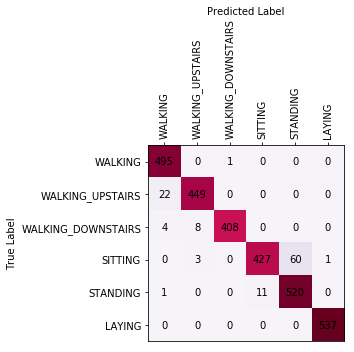

In [48]:
model_log = LogisticRegression(C=10)
model_log.fit(train_data, train_labels)
predict_labels = model_log.predict(test_data)
        
# Calculate metrics
f1_score = metrics.f1_score(test_labels, predict_labels, average = 'weighted')
print(f'F1-Score: {f1_score}')

accuracy = metrics.accuracy_score(test_labels, predict_labels)
print(f'Accuracy: {accuracy}')

print(classification_report(test_labels, predict_labels, target_names = target_names))
show_confusion_mat(test_labels, predict_labels, target_names)

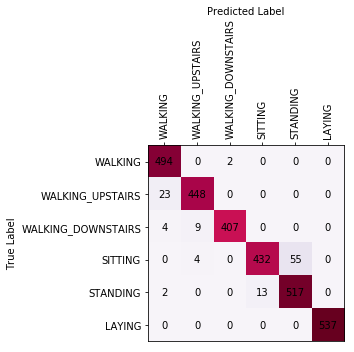

In [42]:
show_confusion_mat(test_labels, predict_labels, target_names)

In [24]:
print(classification_report(test_labels, predict_labels, target_names = target_names))

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       537
          STANDING       0.97      0.88      0.92       491
  WALKING_UPSTAIRS       0.90      0.97      0.94       532
            LAYING       0.94      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
           SITTING       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [32]:
accuracy = metrics.accuracy_score(test_labels, predict_labels)
print(accuracy)

0.9619952494061758


In [33]:
coefs = model_log.coef_
coefs

array([[-0.0899107 ,  0.00292006,  0.05290771, ...,  1.6327808 ,
        -0.37972022, -0.19304005],
       [-0.00996507, -0.04925666, -0.15132713, ..., -1.85269501,
        -1.94880426, -0.18321026],
       [ 0.0348283 ,  0.10065145,  0.18836939, ..., -1.16659207,
         2.17465635,  0.2145819 ],
       [-0.15111739, -0.06683331,  0.0980256 , ..., -0.33704903,
        -0.20862679,  0.06830182],
       [ 0.62796552,  0.14861174,  0.24044961, ..., -0.66722133,
        -0.37122092, -0.09816689],
       [-0.31900151, -0.33912766, -0.39835301, ...,  0.53861799,
         1.00996958,  0.43898122]])

### Comments and Next Steps 

## Binary Classification - Dynamic vs. Static

F1-Score: 1.0
Accuracy: 1.0
             precision    recall  f1-score   support

    DYNAMIC       1.00      1.00      1.00      1387
     STATIC       1.00      1.00      1.00      1560

avg / total       1.00      1.00      1.00      2947



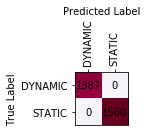

In [79]:
model_log = LogisticRegression()
model_log.fit(train_data, train_group)
predict_labels = model_log.predict(test_data)
        
# Calculate metrics
f1_score = metrics.f1_score(test_group, predict_labels, average = 'weighted')
print(f'F1-Score: {f1_score}')

accuracy = metrics.accuracy_score(test_group, predict_labels)
print(f'Accuracy: {accuracy}')

print(classification_report(test_group, predict_labels, target_names = group_names))
show_confusion_mat(test_group, predict_labels, group_names)

In [105]:
coefs = model_log.coef_
sort_val_coefs = np.sort(coefs)
for val in np.flip(sort_val_coefs[0, -10:], axis = 0):
    print(val)
sort_ind_coefs = np.argsort(coefs)
sort_contribute = all_columns[sort_ind_coefs]
for contrib in np.flip(sort_contribute[0, -10:], axis = 0):
    print(contrib)

0.6486409467940233
0.40066959474697583
0.3632641235060091
0.3574173907846297
0.2980679342716545
0.2839036673894364
0.2740198548311795
0.2726407545810181
0.26693554691019733
0.26504097427806517
tGravityAcc-entropy()-Y
fBodyAccMag-kurtosis()
fBodyAccJerk-maxInds-X
fBodyAccMag-skewness()
tGravityAcc-max()-Y
tGravityAcc-energy()-Y
tGravityAcc-mean()-Y
angle(X,gravityMean)
tGravityAcc-iqr()-Z
tGravityAcc-std()-Z


(array([  4.,   5.,  14.,  35.,  60.,  90., 152., 138.,  35.,  17.,   7.,
          3.,   0.,   0.,   1.]),
 array([-0.51210456, -0.43472152, -0.35733849, -0.27995546, -0.20257242,
        -0.12518939, -0.04780635,  0.02957668,  0.10695971,  0.18434275,
         0.26172578,  0.33910881,  0.41649185,  0.49387488,  0.57125791,
         0.64864095]),
 <a list of 15 Patch objects>)

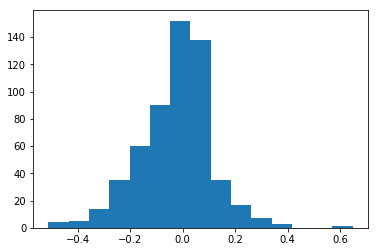

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(coefs[0,:], bins = 15)

# 2 Component PCA 

/Users/annielane/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/annielane/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1-Score: 0.5460981759907311
Accuracy: 0.5972175093315236
                    precision    recall  f1-score   support

           WALKING       0.48      0.70      0.57       537
  WALKING_UPSTAIRS       0.00      0.00      0.00       491
WALKING_DOWNSTAIRS       0.48      0.69      0.57       532
           SITTING       0.66      0.80      0.72       496
          STANDING       0.67      0.49      0.57       420
            LAYING       0.84      0.87      0.86       471

       avg / total       0.52      0.60      0.55      2947



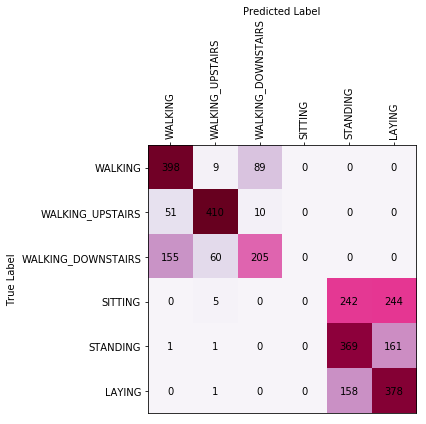

In [65]:
pca = PCA(2)
train_pca_data = pca.fit_transform(train_data)
test_pca_data = pca.transform(test_data)


model_log = LogisticRegression()
model_log.fit(train_pca_data, train_labels)
predict_labels = model_log.predict(test_pca_data)
        
# Calculate metrics
f1_score = metrics.f1_score(test_labels, predict_labels, average = 'weighted')
print(f'F1-Score: {f1_score}')

accuracy = metrics.accuracy_score(test_labels, predict_labels)
print(f'Accuracy: {accuracy}')

print(classification_report(test_labels, predict_labels, target_names = target_names))
show_confusion_mat(test_labels, predict_labels, target_names)

## 100 Component PCA

F1-Score: 0.9502167393483999
Accuracy: 0.9504580929759077
                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       537
  WALKING_UPSTAIRS       0.94      0.85      0.89       491
WALKING_DOWNSTAIRS       0.88      0.95      0.92       532
           SITTING       0.94      1.00      0.96       496
          STANDING       0.99      0.97      0.98       420
            LAYING       0.97      0.93      0.95       471

       avg / total       0.95      0.95      0.95      2947



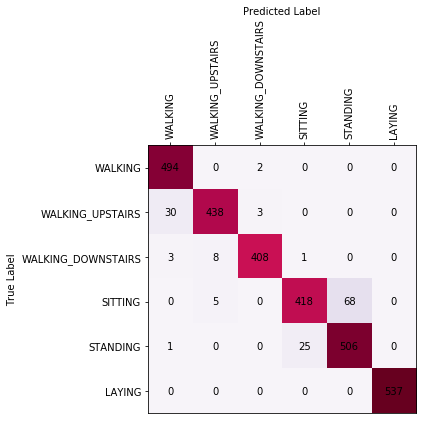

In [66]:
pca = PCA(100)
train_pca_data = pca.fit_transform(train_data)
test_pca_data = pca.transform(test_data)


model_log = LogisticRegression()
model_log.fit(train_pca_data, train_labels)
predict_labels = model_log.predict(test_pca_data)
        
# Calculate metrics
f1_score = metrics.f1_score(test_labels, predict_labels, average = 'weighted')
print(f'F1-Score: {f1_score}')

accuracy = metrics.accuracy_score(test_labels, predict_labels)
print(f'Accuracy: {accuracy}')

print(classification_report(test_labels, predict_labels, target_names = target_names))
show_confusion_mat(test_labels, predict_labels, target_names)

## 10 Component PCA

F1-Score: 0.8640719158062342
Accuracy: 0.8649474041398032
                    precision    recall  f1-score   support

           WALKING       1.00      0.99      0.99       537
  WALKING_UPSTAIRS       0.79      0.75      0.77       491
WALKING_DOWNSTAIRS       0.79      0.82      0.81       532
           SITTING       0.84      0.97      0.90       496
          STANDING       0.90      0.78      0.83       420
            LAYING       0.88      0.86      0.87       471

       avg / total       0.87      0.86      0.86      2947



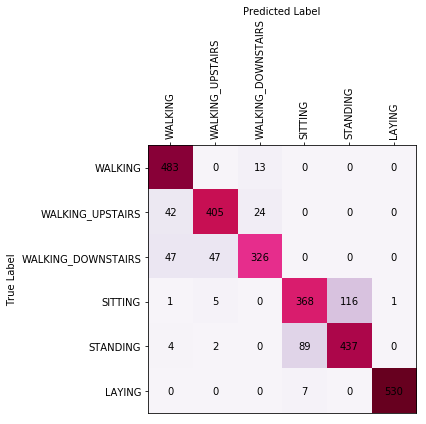

In [106]:
pca = PCA(10)
train_pca_data = pca.fit_transform(train_data)
test_pca_data = pca.transform(test_data)


model_log = LogisticRegression()
model_log.fit(train_pca_data, train_labels)
predict_labels = model_log.predict(test_pca_data)
        
# Calculate metrics
f1_score = metrics.f1_score(test_labels, predict_labels, average = 'weighted')
print(f'F1-Score: {f1_score}')

accuracy = metrics.accuracy_score(test_labels, predict_labels)
print(f'Accuracy: {accuracy}')

print(classification_report(test_labels, predict_labels, target_names = target_names))
show_confusion_mat(test_labels, predict_labels, target_names)

## Create a search over the space

AttributeError: 'str' object has no attribute 'shape'

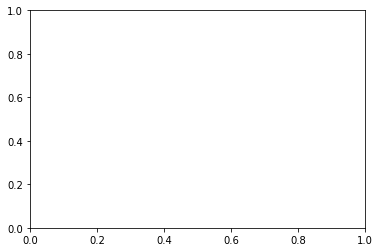

In [78]:
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

train_cat = df_rtrain['Activity'].astype('category')
df_pca = pd.DataFrame({'x' : train_pca_data[:,0],
                       'y' : train_pca_data[:,1],
                       'cat' : train_cat
})
df_pca.plot.scatter('x', 'y', c='cat')

#plt.scatter(train_pca_data[:,0],train_pca_data[:,1], c = train_cat)


In [71]:
train_cat[0:10]

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
5    STANDING
6    STANDING
7    STANDING
8    STANDING
9    STANDING
Name: Activity, dtype: category
Categories (6, object): [LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS]

# Look at only Frequency Domain 

In [108]:
freq_columns = [col if re.match('^f', col) for col in feature_columns]
len(freq_columns)

SyntaxError: invalid syntax (<ipython-input-108-331333ffda63>, line 1)